In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import surrogate

## Running experiments for the bridge problem

In [2]:
config = dict()
config["POD_RANK"] = 3
config["X1_DOMAIN"] = [3e4, 7e4]
config["X2_DOMAIN"] = [1.6e11, 2.2e11]
total_data = 200
config["RESHAPE_SIZE"] = None

In [3]:
# Performing multiple experiments: 
#   - Homogenous case with mean regression and CCRM 
#   - Heterogenous case with mean regression and CCRM

### HOMOGENOUS CASE
# load dataset
config["PATH"] = "data/interval_cases/interval_bridges200_homogen.mat"
# Mean regression
config["FIT_RANGE"] = False
rmse_l_ho_mean = []
rmse_u_ho_mean = []
data_fraction=[]
# RMSE experiments on different number of training data
for i in range(10,45,5):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _, _ = surrogate.main(config)
    rmse_l_ho_mean.append(rmse_lobound)
    rmse_u_ho_mean.append(rmse_upbound)
    data_fraction.append(100 * i/total_data)

# CCRM
config["FIT_RANGE"] = True
rmse_l_ho_ccrm = []
rmse_u_ho_ccrm = []
# RMSE experiments on different number of training data
for i in range(10,45,5):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _, _ = surrogate.main(config)
    rmse_l_ho_ccrm.append(rmse_lobound)
    rmse_u_ho_ccrm.append(rmse_upbound)

In [4]:
### HETEROGENOUS CASE
# load data
config["PATH"] = "data/interval_cases/interval_bridges200_hetero.mat"
# Mean regression
config["FIT_RANGE"] = False
rmse_l_he_mean = []
rmse_u_he_mean = []
for i in range(10,45,5):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _, _ = surrogate.main(config)
    rmse_l_he_mean.append(rmse_lobound)
    rmse_u_he_mean.append(rmse_upbound)
# CCRM
config["FIT_RANGE"] = True
rmse_l_he_ccrm = []
rmse_u_he_ccrm = []
for i in range(10,45,5):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _, _ = surrogate.main(config)
    rmse_l_he_ccrm.append(rmse_lobound)
    rmse_u_he_ccrm.append(rmse_upbound)

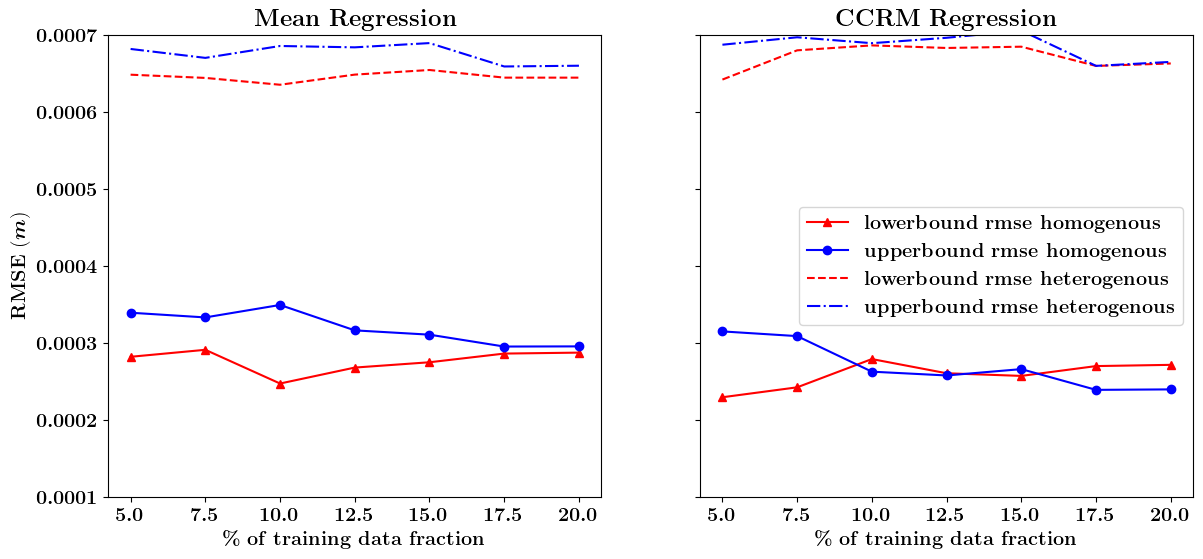

In [5]:
# Plotting
meanreg_data = [rmse_l_ho_mean, rmse_u_ho_mean, rmse_l_he_mean, rmse_u_he_mean]
ccrm_data = [rmse_l_ho_ccrm, rmse_u_ho_ccrm, rmse_l_he_ccrm, rmse_u_he_ccrm]

surrogate.error_plot(meanreg_data, ccrm_data, data_fraction, savefile="images/bridge_rmse.png")